In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

### Load the Data

In [2]:
raw = pd.read_csv('3.01.+Country+clusters.csv')
raw

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Load the Data

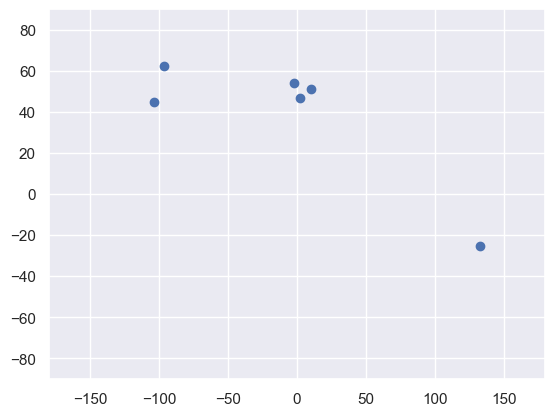

In [3]:
plt.scatter(raw['Longitude'],raw['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Select the Features

In [4]:
x = raw.iloc[:,1:3].values
x

array([[  44.97, -103.77],
       [  62.4 ,  -96.8 ],
       [  46.75,    2.4 ],
       [  54.01,   -2.53],
       [  51.15,   10.4 ],
       [ -25.45,  133.11]])

### Clustering

In [5]:
kmeans = KMeans(3)


In [6]:
kmeans.fit(x)

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

### Clustering Results

In [7]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, 0, 0, 2], dtype=int32)

In [8]:
data_with_cluster = raw.copy()
data_with_cluster['Cluster'] = identified_cluster
data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,2


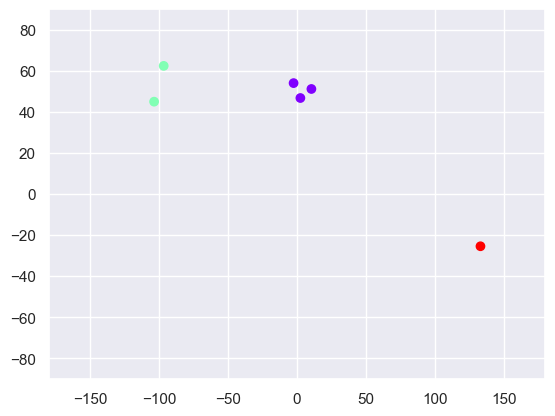

In [9]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c = data_with_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# 3.07. Categorical Data

In [10]:
data_mapped = raw.copy()
data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French': 1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [11]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [18]:
kmeans = KMeans(3,n_init=10)

In [28]:
kmeans.fit(x)

/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [20]:
identified_cluster = kmeans.fit_predict(x)
identified_cluster

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [21]:
data_with_cluster = raw.copy()
data_with_cluster['Cluster'] = identified_cluster
data_with_cluster


,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


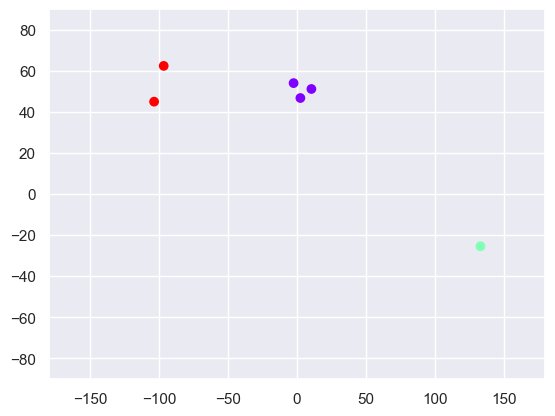

In [22]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c = data_with_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Map the Data

##  WCSS ( Within-Clusters Sum of Squares)

WCSS

In [23]:
kmeans.inertia_

290.10523333333333

In [24]:
wcss = []

for i in range(1, 7):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)  # Assuming x is your data
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)


/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gabrielmarcellinojoestiawan/opt/anaconda3/lib/python3.9/site-packa

In [25]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

<strong> THE ELBOW METHOD <strong ><br>
- to optimize WCSS ( within-cluster Sum of Squared) <br>
- you need 2 variables : number of clusters and WCSS number

Text(0.5, 0, 'Number of Clusters')

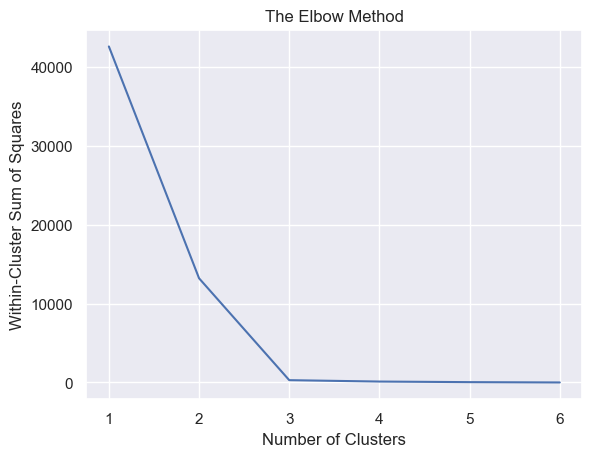

In [26]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.ylabel('Within-Cluster Sum of Squares')
plt.xlabel('Number of Clusters')